In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


627

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=deb5b102a6498779b843effd893a5510


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 13 | port elizabeth
Processing Record 3 of Set 13 | romitan
Processing Record 4 of Set 13 | saint anthony
Processing Record 5 of Set 13 | mnogovershinnyy
Processing Record 6 of Set 13 | warqla
City not found. Skipping...
Processing Record 7 of Set 13 | malwan
City not found. Skipping...
Processing Record 8 of Set 13 | cape town
Processing Record 9 of Set 13 | vaini
Processing Record 10 of Set 13 | rikitea
Processing Record 11 of Set 13 | eydhafushi
Processing Record 12 of Set 13 | kruisfontein
Processing Record 13 of Set 13 | port blair
Processing Record 14 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 13 | jamestown
Processing Record 16 of Set 13 | cabo san lucas
Processing Record 17 of Set 13 | albany
Processing Record 18 of Set 13 | saquarema
Processing Record 19 of Set 13 | padang
Proces

Processing Record 30 of Set 16 | hithadhoo
Processing Record 31 of Set 16 | guerrero negro
Processing Record 32 of Set 16 | shelburne
Processing Record 33 of Set 16 | sorong
Processing Record 34 of Set 16 | plouzane
Processing Record 35 of Set 16 | dicabisagan
Processing Record 36 of Set 16 | severo-kurilsk
Processing Record 37 of Set 16 | dhidhdhoo
Processing Record 38 of Set 16 | puerto madryn
Processing Record 39 of Set 16 | dunedin
Processing Record 40 of Set 16 | dzhusaly
City not found. Skipping...
Processing Record 41 of Set 16 | bosaso
Processing Record 42 of Set 16 | bengkulu
Processing Record 43 of Set 16 | kirkuk
Processing Record 44 of Set 16 | upernavik
Processing Record 45 of Set 16 | pacific grove
Processing Record 46 of Set 16 | hasaki
Processing Record 47 of Set 16 | newport
Processing Record 48 of Set 16 | patharia
Processing Record 49 of Set 16 | tabarqah
City not found. Skipping...
Processing Record 50 of Set 16 | aquiraz
Processing Record 1 of Set 17 | kenai
Proces

Processing Record 14 of Set 20 | paita
Processing Record 15 of Set 20 | nago
Processing Record 16 of Set 20 | llaillay
Processing Record 17 of Set 20 | ashtian
Processing Record 18 of Set 20 | coahuayana
Processing Record 19 of Set 20 | la paz
Processing Record 20 of Set 20 | dmanisi
Processing Record 21 of Set 20 | teruel
Processing Record 22 of Set 20 | bayir
Processing Record 23 of Set 20 | harper
Processing Record 24 of Set 20 | nikel
Processing Record 25 of Set 20 | oriximina
Processing Record 26 of Set 20 | ternate
Processing Record 27 of Set 20 | calamar
Processing Record 28 of Set 20 | flinders
Processing Record 29 of Set 20 | jalingo
Processing Record 30 of Set 20 | poso
Processing Record 31 of Set 20 | carnarvon
Processing Record 32 of Set 20 | port hawkesbury
Processing Record 33 of Set 20 | tulun
Processing Record 34 of Set 20 | aksu
Processing Record 35 of Set 20 | rockport
Processing Record 36 of Set 20 | narbonne
Processing Record 37 of Set 20 | karaul
City not found. Sk

Processing Record 3 of Set 24 | knyaze-volkonskoye
Processing Record 4 of Set 24 | atambua
Processing Record 5 of Set 24 | lazaro cardenas
Processing Record 6 of Set 24 | kaeo
Processing Record 7 of Set 24 | omsukchan
Processing Record 8 of Set 24 | baghdad
Processing Record 9 of Set 24 | taitung
Processing Record 10 of Set 24 | treinta y tres
Processing Record 11 of Set 24 | katherine
Processing Record 12 of Set 24 | alice springs
Processing Record 13 of Set 24 | williamsburg
Processing Record 14 of Set 24 | lixourion
Processing Record 15 of Set 24 | adamas
Processing Record 16 of Set 24 | marystown
Processing Record 17 of Set 24 | yirol
City not found. Skipping...
Processing Record 18 of Set 24 | zhangye
Processing Record 19 of Set 24 | chara
Processing Record 20 of Set 24 | yenagoa
Processing Record 21 of Set 24 | bulri
Processing Record 22 of Set 24 | tabou
Processing Record 23 of Set 24 | braila
Processing Record 24 of Set 24 | saint-augustin
Processing Record 25 of Set 24 | golak

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.9180,25.5701,73.69,94,75,12.66,ZA,2022-02-12 19:03:21
1,Romitan,39.9343,64.3814,33.75,80,0,6.91,UZ,2022-02-12 19:03:22
2,Saint Anthony,45.0205,-93.2180,4.28,63,100,6.91,US,2022-02-12 19:03:22
3,Mnogovershinnyy,53.9353,139.9242,6.12,98,100,3.18,RU,2022-02-12 19:03:23
4,Cape Town,-33.9258,18.4232,70.27,78,100,1.99,ZA,2022-02-12 19:03:23
5,Vaini,-21.2000,-175.2000,80.76,89,20,4.61,TO,2022-02-12 19:03:24
6,Rikitea,-23.1203,-134.9692,79.02,70,3,17.00,PF,2022-02-12 19:03:24
7,Eydhafushi,5.1033,73.0708,81.14,75,100,8.37,MV,2022-02-12 19:03:25
8,Kruisfontein,-34.0033,24.7314,71.38,94,87,5.17,ZA,2022-02-12 19:03:25
9,Port Blair,11.6667,92.7500,76.37,72,13,13.60,IN,2022-02-12 19:03:26


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

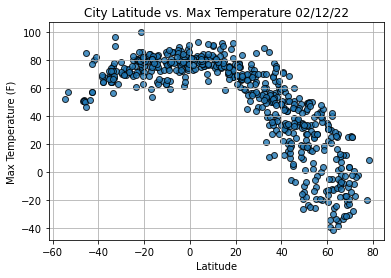

In [10]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

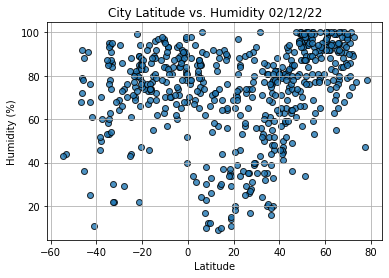

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

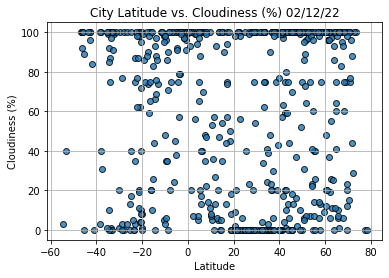

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

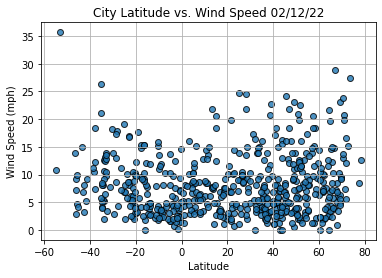

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [14]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [15]:
index13 = city_data_df.loc[13]

index13

City                    Saquarema
Lat                        -22.92
Lng                      -42.5103
Max Temp                    80.64
Humidity                       81
Cloudiness                     35
Wind Speed                   8.63
Country                        BR
Date          2022-02-12 19:03:27
Name: 13, dtype: object

In [16]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
568     True
569     True
570     True
571    False
572     True
Name: Lat, Length: 573, dtype: bool

In [17]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Romitan,39.9343,64.3814,33.75,80,0,6.91,UZ,2022-02-12 19:03:22
2,Saint Anthony,45.0205,-93.2180,4.28,63,100,6.91,US,2022-02-12 19:03:22
3,Mnogovershinnyy,53.9353,139.9242,6.12,98,100,3.18,RU,2022-02-12 19:03:23
7,Eydhafushi,5.1033,73.0708,81.14,75,100,8.37,MV,2022-02-12 19:03:25
9,Port Blair,11.6667,92.7500,76.37,72,13,13.60,IN,2022-02-12 19:03:26


In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

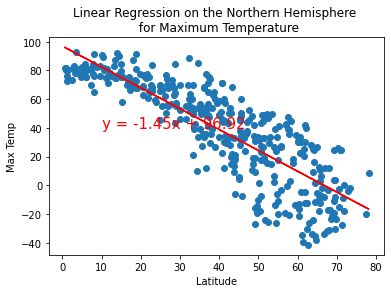

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

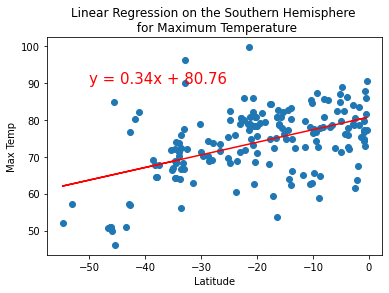

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

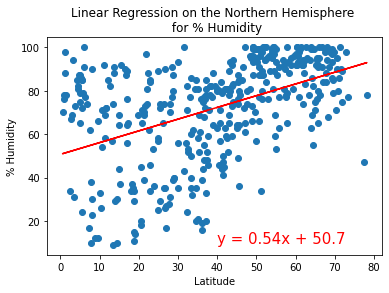

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

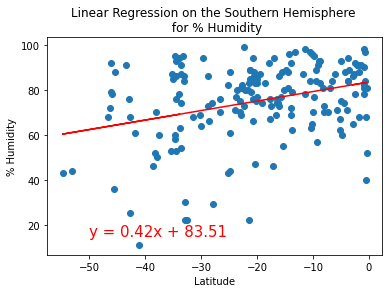

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

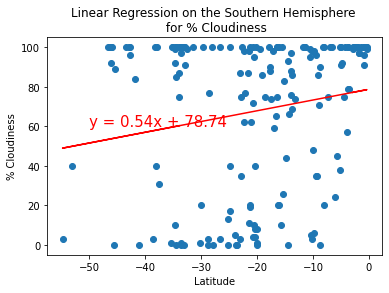

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

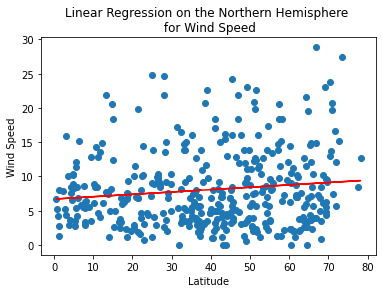

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))


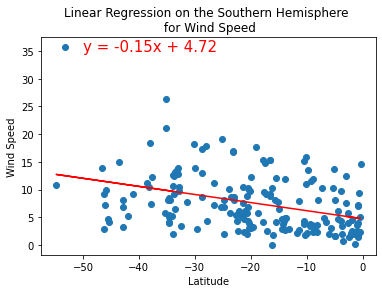

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))